In [3]:
import os
import requests
import subprocess
import sys

root = os.getcwd()  # Gets the current working directory\n",
sys.path.append(root)
print(root)

c:\Users\jurri\M3DMRoadInspection


In [4]:
# Define paths relative to the root directory
weights_dir = os.path.join(root, 'yolov7', 'seg')
os.makedirs(weights_dir, exist_ok=True)

# Define the URL for the weights file\n",
weights_url = r"https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7-seg.pt"

# Define the path to save the downloaded weights\n",
WEIGHTS_PATH = os.path.join(weights_dir, "yolov7-seg.pt")

# Download the weights file\n",
response = requests.get(weights_url, stream=True)
if response.status_code == 200:
    with open(WEIGHTS_PATH, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)
    print(f"Downloaded weights to {WEIGHTS_PATH}")
else:
    print(f"Failed to download weights. Status code: {response.status_code}")

Downloaded weights to c:\Users\jurri\M3DMRoadInspection\yolov7\seg\yolov7-seg.pt


In [5]:
# Google Drive URL for the image
google_drive_url = "https://docs.google.com/uc?export=download&id=1sPYHUcIW48sJ67kh5MHOI3GfoXlYNOfJ"
image_dir = os.path.join(root, 'yolov7', 'seg')
os.makedirs(image_dir, exist_ok=True)

# Define the path to save the downloaded image
IMAGE_PATH = os.path.join(image_dir, "dog.jpeg")

# Start the request to fetch the image file
session = requests.Session()
response = requests.get(google_drive_url, stream=True)

# Save the file to disk
if response.status_code == 200:
    with open(IMAGE_PATH, 'wb') as file:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                file.write(chunk)

print(f"Downloaded image to {IMAGE_PATH}")


Downloaded image to c:\Users\jurri\M3DMRoadInspection\yolov7\seg\dog.jpeg


In [6]:
# Set the working directory and path to the predict script
predict_script_path = os.path.join(root, 'yolov7', 'seg', 'segment', 'predict.py')

# Function to validate if a path exists
def validate_path(path):
    if os.path.exists(path):
        print(f"Path exists: {path}")
    else:
        print(f"Path does not exist: {path}")

# Command to run the predict.py script with subprocess
command = (
    f"{os.path.join(root, '.venv', 'Scripts', 'python.exe')} {predict_script_path} --weights {WEIGHTS_PATH} --source {IMAGE_PATH} --name coco"
)

# Execute the command, setting the current working directory
try:
    result = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(result.stdout.decode())
except subprocess.CalledProcessError as e:
    print(f"Error executing command: {e}")
    print(e.stderr.decode())

# Define the result image path relative to root
RESULT_IMAGE_PATH = os.path.join(root, 'yolov7', 'seg', 'runs', 'predict-seg', 'coco', 'dog.jpeg')


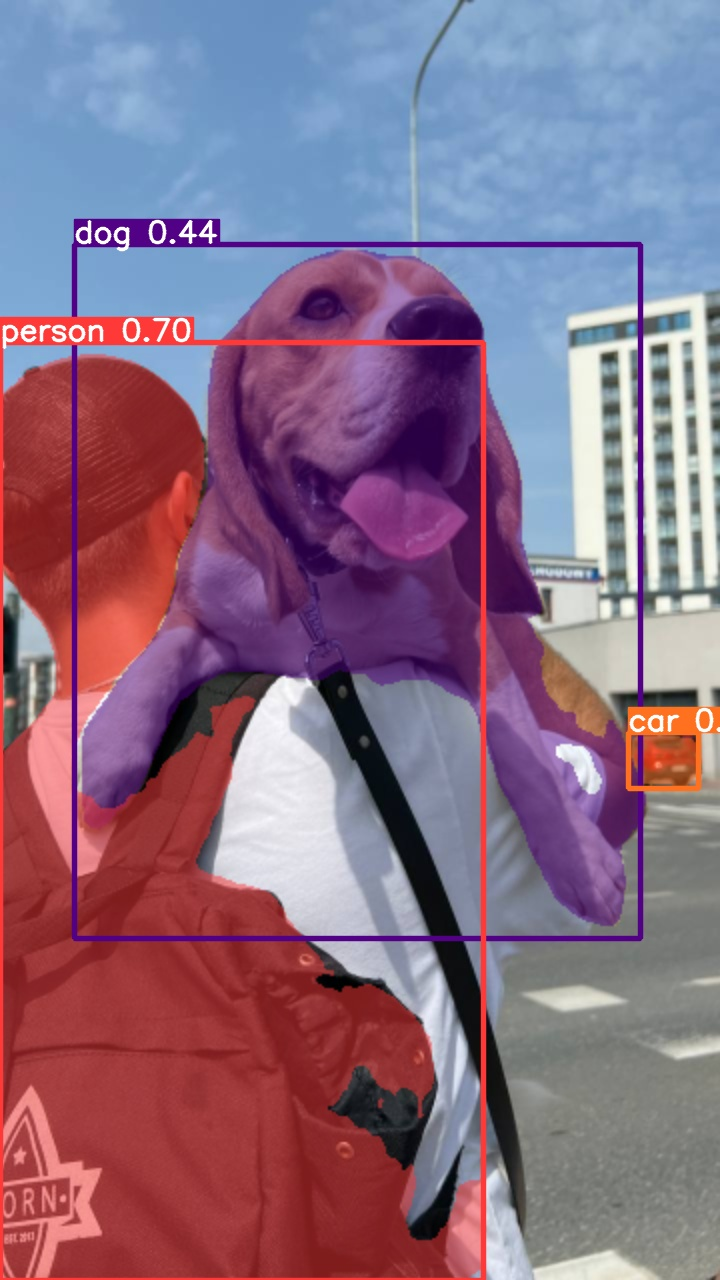

In [7]:
from IPython.display import Image, display
display(Image(filename=RESULT_IMAGE_PATH))

In [ ]:
"""pip install roboflow
from roboflow import Roboflow

# Initialize the Roboflow instance with the API key
rf = Roboflow(api_key="IZPa2gbjZfwr8WECz2FG")

# Access the workspace and project
project = rf.workspace("university-bswxt").project("crack-bphdr")

# Access the specific version and download the dataset
version = project.version(2)
dataset = version.download("yolov7")"""


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to crack-2 in yolov7pytorch:: 100%|██████████| 8070/8070 [00:06<00:00, 1263.21it/s]


In [9]:
# Only works on GPU, takes over an hour

WEIGHTS_PATH = f"{root}/yolov7/seg/yolov7-seg.pt"
Dataset = f"{root}/yolov7/seg/crack-2/"

"""%cd {root}/yolov7/seg
!python segment/train.py --batch 1 \
--epochs 10 \
--data {Dataset}/data.yaml \
--weights {WEIGHTS_PATH} \
--device 0 \
--name custom"""

'%cd {root}/yolov7/seg\n!python segment/train.py --batch 1 --epochs 10 --data {Dataset}/data.yaml --weights {WEIGHTS_PATH} --device 0 --name custom'

In [11]:
%cd {root}/yolov7/seg
!python segment/predict.py \
--weights {root}/yolov7/seg/runs/train-seg/custom/weights/best.pt \
--conf 0.25 \
--source {Dataset}/test/images

c:\Users\jurri\M3DMRoadInspection\yolov7\seg


segment\predict: weights=['c:\\Users\\jurri\\M3DMRoadInspection/yolov7/seg/runs/train-seg/custom/weights/best.pt'], source=c:\Users\jurri\M3DMRoadInspection/yolov7/seg/crack-2//test/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  2024-11-11 Python-3.12.7 torch-2.5.1+cpu CPU

C:\Users\jurri\M3DMRoadInspection\yolov7\seg\models\experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/

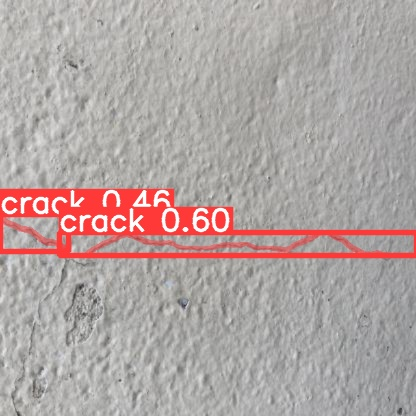

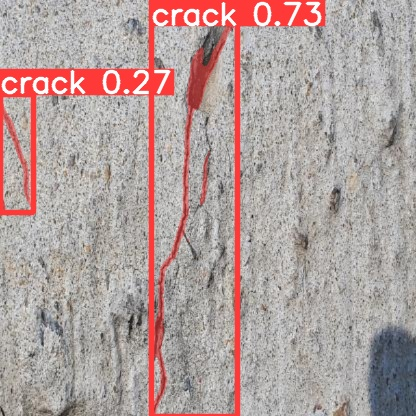

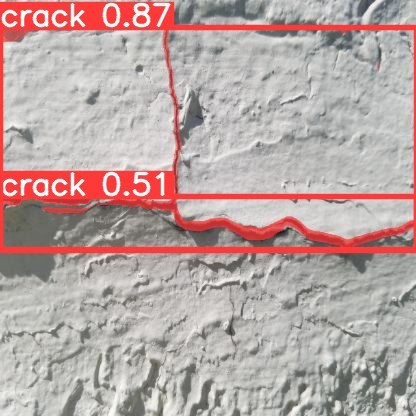

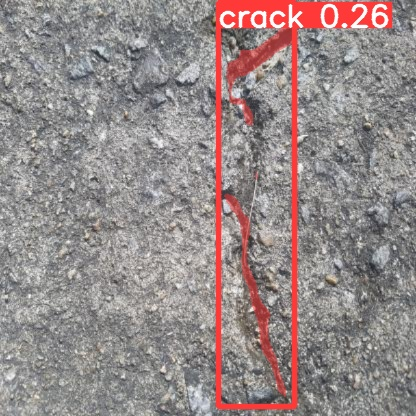

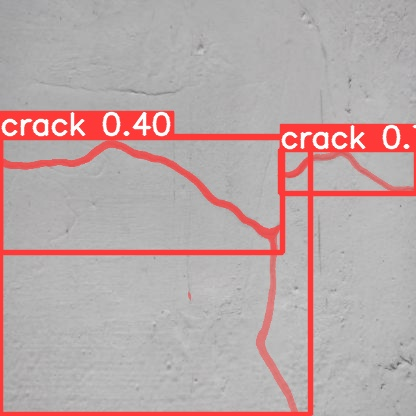

In [20]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(f'{root}/yolov7/seg/runs/predict-seg/exp3/*.jpg')[:5]:
    display(Image(filename=imageName))
    print("\n")


